In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Table_Optimal.csv')

In [3]:
print df.dtypes

$c^{1}$       int64
$c^{2}$       int64
$c^{3}$       int64
$c^{4}$       int64
$c^{5}$       int64
$y^{1}$       int64
$y^{2}$       int64
$y^{3}$       int64
$y^{4}$       int64
$y^{5}$       int64
$t$           int64
ExpValue    float64
$d_{0}$       int64
$d_{1}$       int64
$d_{2}$       int64
$d_{3}$       int64
$d_{4}$       int64
$d_{5}$       int64
$d_{6}$       int64
$d_{7}$       int64
$d_{8}$       int64
$d_{9}$       int64
$d_{10}$      int64
dtype: object


In [4]:
df_Series2 = pd.DataFrame(index=['$d_{0}$', '%%%%%'], columns=range(11))

for j in df.groupby('$d_{0}$').size().index:
    df_Series2[j]['$d_{0}$'] = df.groupby('$d_{0}$').size()[j]
for j in df.groupby('$d_{0}$').size().index:    
    df_Series2[j]['%%%%%'] = np.around((df_Series2[j]['$d_{0}$']/df_Series2.sum(axis=1)['$d_{0}$'])*100, 2)

print df_Series2.to_latex()

\begin{tabular}{llllllllllll}
\toprule
{} &     0  &    1  &   2  &    3  &   4  &    5  &   6  &     7  &   8  &   9  &   10 \\
\midrule
\$d\_\{0\}\$ &  24151 &  1168 &  NaN &  2787 &  NaN &  3226 &  NaN &   3628 &  NaN &  NaN &  NaN \\
\%\%\%\%\%   &  69.08 &  3.34 &  NaN &  7.97 &  NaN &  9.23 &  NaN &  10.38 &  NaN &  NaN &  NaN \\
\bottomrule
\end{tabular}



In [5]:
df_Series = pd.DataFrame(index=df.dtypes[13:].index, columns=[0, 1,  2, 3])

for i in df.dtypes[13:].index:
    for j in df.groupby(i).size().index:
        df_Series[j][i] = df.groupby(i).size()[j]
    
for i in range(4):
    df_Series[str(i)+'%'] = pd.Series((df_Series[i]/df_Series.sum(axis=1))*100)
    for j in df_Series.index:
        df_Series[str(i)+'%'][j] = np.around(df_Series[str(i)+'%'][j], 2)
    
df_Series = df_Series.reindex_axis([0, '0%', 1, '1%', 2, '2%', 3, '3%'], axis=1)

print df_Series.to_latex()

\begin{tabular}{lllllllll}
\toprule
{} &      0 &     0\% &      1 &     1\% &     2 &     2\% &     3 &     3\% \\
\midrule
\$d\_\{1\}\$  &  33752 &  96.54 &     40 &   0.11 &   NaN &    NaN &  1168 &   3.33 \\
\$d\_\{2\}\$  &  33464 &  95.72 &   1175 &   3.35 &   NaN &    NaN &   321 &   0.92 \\
\$d\_\{3\}\$  &  32019 &  91.59 &     44 &   0.13 &   NaN &    NaN &  2897 &   8.26 \\
\$d\_\{4\}\$  &  29915 &  85.57 &   3066 &   8.75 &  1092 &   3.12 &   887 &   2.53 \\
\$d\_\{5\}\$  &  31401 &  89.82 &     44 &   0.13 &   NaN &    NaN &  3515 &  10.03 \\
\$d\_\{6\}\$  &  24944 &  71.35 &   6015 &  17.17 &  3272 &   9.34 &   729 &   2.08 \\
\$d\_\{7\}\$  &  30819 &  88.16 &     30 &   0.09 &   NaN &    NaN &  4111 &  11.73 \\
\$d\_\{8\}\$  &  17557 &  50.22 &  10109 &  28.87 &  6966 &  19.88 &   328 &   0.94 \\
\$d\_\{9\}\$  &  33780 &  96.62 &    880 &   2.51 &   300 &   0.86 &   NaN &    NaN \\
\$d\_\{10\}\$ &   8720 &  24.94 &  16871 &  48.22 &  9369 &  26.74 &   NaN &    NaN \\
\bott

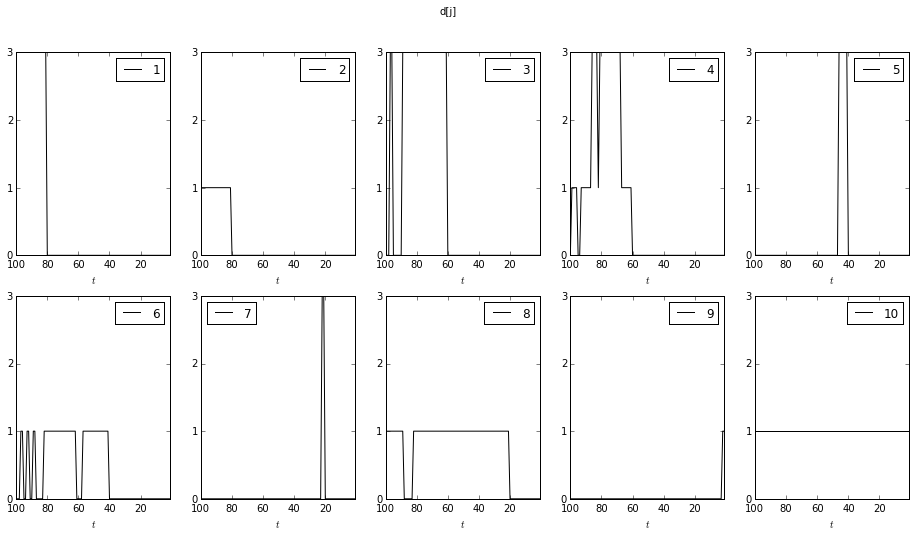

In [6]:
df_Series3 = df[(df['$c^{1}$'] == 1) & (df['$c^{2}$'] == 1) & (df['$c^{3}$'] == 1) & (df['$c^{4}$'] == 1)
               & (df['$c^{5}$'] == 1)]

df3 = pd.DataFrame(index=df_Series3['$t$'])
g = 1 
for i in df.dtypes[13:].index:
    df3[g] = np.array(df_Series3[i])
    g = g+1
del g

plt.figure()
# Y-Achse ist abhängig von der Anzahl der möglichen Entscheidungen
df3.plot(subplots=True, layout=(2, 5), figsize=(16, 8), sharex=False, yticks=np.arange(0, 4, 1.0), title='d[j]')
plt.savefig('OP-J.png') 

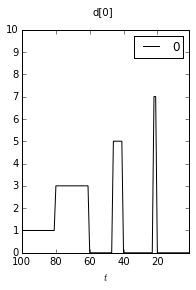

In [7]:
df4 = pd.DataFrame(index=df_Series3['$t$'])
df4[0] = np.array(df_Series3['$d_{0}$'])

plt.figure()
# Y-Achse ist abhängig von der Anzahl der Produkte
df4.plot(subplots=True, layout=(1, 1), figsize=(3, 4), sharex=False, yticks=np.arange(0, 11, 1.0), title='d[0]')
plt.savefig('OP-0.png') 

df3[0] = np.array(df_Series3['$d_{0}$'])
# Spaten abhängig von der Anzahl der Produkte
df3_Series = df3.reindex_axis([0, 1, 2, 3, 4, 5,
                               6, 7, 8, 9, 10], axis=1)

#print df3_Series.to_latex()